In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
data = pd.read_csv('titanic.csv')

# Handle missing values
imputer = SimpleImputer(strategy='median')
data[['age', 'fare']] = imputer.fit_transform(data[['age', 'fare']])
#data.drop(["cabin","boat",""])
data.dropna(axis= 1,thresh = 566,inplace=True)
data.drop("home.dest",axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

In [49]:
# Extract the features and target variable
features = data[['pclass', 'sex', 'age', 'fare']]
target = data['survived']
features = pd.get_dummies(features, drop_first=True)
# NaN values
# data.drop(["cabin", "boat", "body", "home.dest"], inplace=True, axis=1)
# data['age'] = data['age'].fillna(data['age'].median())
# data = data.dropna().reset_index(drop=True)

# Convert categorical variables to numerical
#features = pd.get_dummies(features, drop_first=True)

# Convert features to float64
#features = features.astype('float64')
#features = features.dropna()
print(features.shape,target.shape)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

features

(1307, 4) (1307,)


,pclass,age,fare,sex_male
0,1.0,29.0000,211.3375,0
1,1.0,0.9167,151.5500,1
2,1.0,2.0000,151.5500,0
3,1.0,30.0000,151.5500,1
4,1.0,25.0000,151.5500,0
...,...,...,...,...
1304,3.0,14.5000,14.4542,0
1305,3.0,28.0000,14.4542,0
1306,3.0,26.5000,7.2250,1
1307,3.0,27.0000,7.2250,1


In [28]:
features["sex_male"].unique()

array([0., 1.])

In [50]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

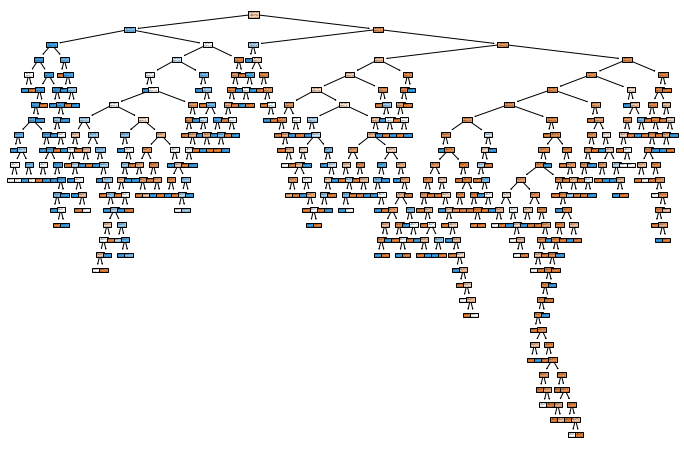

In [51]:
# Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=features.columns)
plt.show()

In [52]:
# Train a decision tree with modified parameters
clf_modified = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
clf_modified.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [53]:
# Predict using the original decision tree
y_pred = clf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

# Predict using the modified decision tree
y_pred_modified = clf_modified.predict(X_test)
accuracy_modified = accuracy_score(y_test, y_pred_modified)

# Compare the accuracies
print("Original Decision Tree Accuracy:", accuracy_original)
print("Modified Decision Tree Accuracy:", accuracy_modified)


Original Decision Tree Accuracy: 0.7251908396946565
Modified Decision Tree Accuracy: 0.7709923664122137


In [54]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier with different number of estimators
n_estimators = [10, 50, 100, 200]

for n in n_estimators:
    # Create and fit the random forest
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(X_train, y_train)

    # Predict using the random forest
    y_pred_forest = forest.predict(X_test)
    accuracy_forest = accuracy_score(y_test, y_pred_forest)
    
    # Print the accuracy for each number of estimators
    print("Random Forest ({} Estimators) Accuracy:".format(n), accuracy_forest)


Random Forest (10 Estimators) Accuracy: 0.7404580152671756
Random Forest (50 Estimators) Accuracy: 0.7557251908396947
Random Forest (100 Estimators) Accuracy: 0.7519083969465649
Random Forest (200 Estimators) Accuracy: 0.767175572519084
